In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree # Decision tree classifier
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
# Set seed
np.random.seed(100)

In [3]:
data_file = pd.read_csv("IPLD.csv")
data = pd.DataFrame(data_file)

In [4]:
# Rename columns
data.columns = ['age', 'sex', 'tb', 'db', 'aap', 'sgpaa', 'sgoaa', 'tp', 'alb', 'ag', 'label']

In [5]:
target = data.label

In [6]:
d = data

In [7]:
# Change sex to boolean so we have all numerical attributes
for i in range(0, len(d)):
    if d.iloc[i,1] == 'Male':
        d.iloc[i,1] = np.int32(1)
    else:
        d.iloc[i,1] = np.int32(0)

In [8]:
#d.iloc[:,1] = d.iloc[:,1].astype('int8')

In [9]:
# Split into test and train data 80/20 split
train_data, test_data = train_test_split(d,test_size=0.2)

In [10]:
# verify that the test and train data are not mixed at all

s1 = set(list(test_data.index))
s2 = set(list(train_data.index))
intersection = s1.intersection(s2)

if len(intersection) != 0:
    print("Error training and test data mixed")
else:
    print("Completed 80/20 split of training and test data")
    print("Data preprocessing complete")
    

Completed 80/20 split of training and test data
Data preprocessing complete


In [11]:
test_data_label = test_data.label
train_data_label = train_data.label

In [12]:
td = train_data.iloc[:,0:10]

In [13]:
td.iloc[:,8] = td.iloc[:,8].astype('float16')

In [14]:
#dot_data = tree.export_graphviz(classifier, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("ipld.gv")

In [15]:
for i in range(len(td.ag)):
    if type(td.iloc[i,8]) != np.float16:
        print(i)

In [16]:
td.isnull().any()

age      False
sex      False
tb       False
db       False
aap      False
sgpaa    False
sgoaa    False
tp       False
alb      False
ag        True
dtype: bool

In [17]:
# Find missing values
index = td['ag'].index[td['ag'].apply(np.isnan)]
df_index = td.index.values.tolist()
[df_index.index(i) for i in index]

[15, 89, 264, 286]

In [18]:
td.ag.describe()

count    461.00000
mean       0.95282
std        0.33077
min        0.30000
25%        0.70000
50%        1.00000
75%        1.10000
max        2.80000
Name: ag, dtype: float64

In [19]:
# Replace missing values with average for column
td.iloc[[15, 89, 264, 286],9] = 0.952637

In [31]:
classifier = tree.DecisionTreeClassifier(max_depth=5)
classifier.fit(td, train_data_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

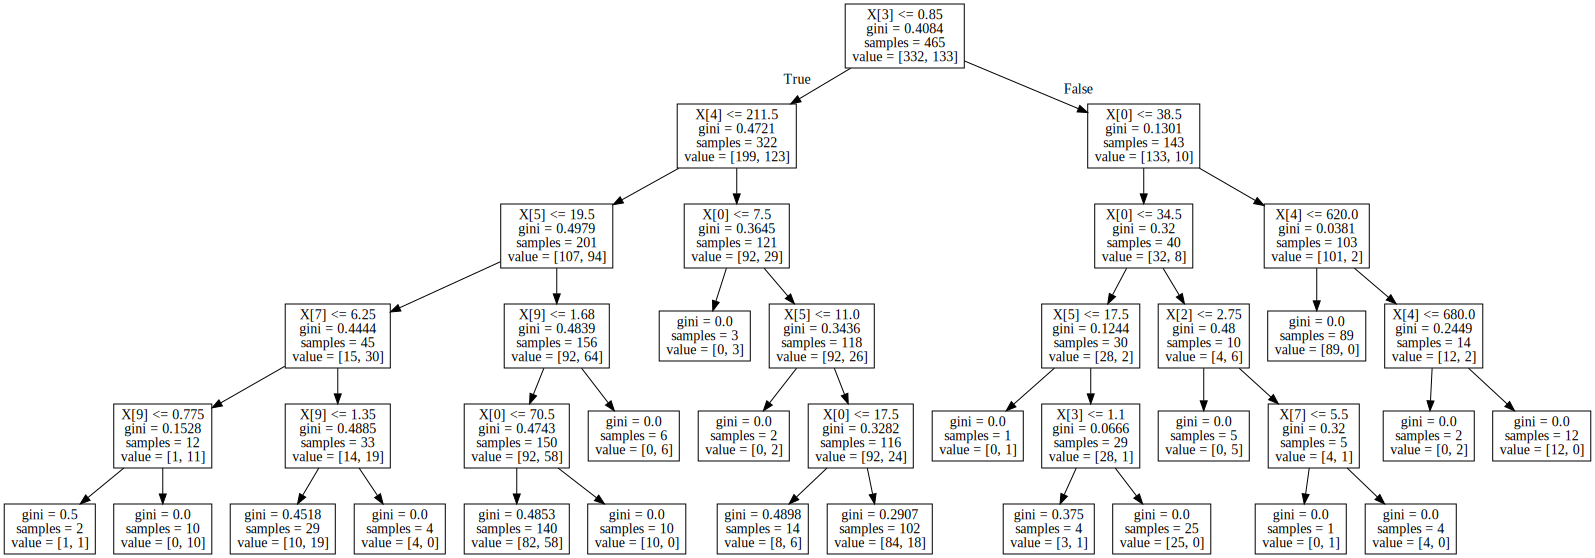

In [32]:
dot_data = tree.export_graphviz(classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("ipld.gv")
graph

In [22]:
predicted_score = classifier.predict(test_data.iloc[:,0:10])

In [23]:
score = classifier.score(test_data.iloc[:,0:10], test_data_label)

In [24]:
type(predicted_score)

numpy.ndarray

In [25]:
actual_test_label = list(test_data_label)
predicted_score = list(predicted_score)

In [26]:
tn, fp, fn, tp = confusion_matrix(actual_test_label, predicted_score).ravel()

In [27]:
print("Accuracy: %0.4f%%" % (((tp + tn) / (tn + fp + fn + tp)) * 100))

Accuracy: 68.3761%


In [28]:
print("Prevelence: %0.4f%%" % (((tp) / (tn + fp + fn + tp)) * 100))

Prevelence: 3.4188%


In [29]:
print("Missclassification Rate: %0.4f%%" % (((fp + fn) / (tn + fp + fn + tp)) * 100))

Missclassification Rate: 31.6239%
